In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
def getDf():
    files = {}
    for size in [1000000, 1500000, 10000000, 15000000]:
        with open("../result/resultRustVarious_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size1000000']
    for s in [1500000, 10000000, 15000000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str, "method": str, "type": str, "mutability": bool , "size": int, "inittime": int, \
                    "addtime": int, 'accesstime': int,"totaltime": int, "correct": bool})
    return data

In [180]:
df = getDf()

In [182]:
df

,datastructure,method,type,mutability,size,inittime,addtime,accesstime,totaltime,correct
1,[RustVector],"""memcpy""","""Integer""",True,1000000,6928,2587360,88868984,268138435,True
2,[RustVector],"""memcpy""","""Integer""",True,1000000,6556,2618316,90559707,267793959,True
3,[RustVector],"""memcpy""","""Integer""",True,1000000,6159,2757115,88630040,267003383,True
4,[RustVector],"""memcpy""","""Integer""",True,1000000,6603,2580043,88707246,265739032,True
5,[RustVector],"""memcpy""","""Integer""",True,1000000,6619,2628275,88426863,265242883,True
...,...,...,...,...,...,...,...,...,...,...
76,[RustVector],"""clone_from""","""String""",True,15000000,6506,1602641626,1430433684,79296997145,True
77,[RustVector],"""clone_from""","""String""",True,15000000,6549,1579255550,1429770164,79179716941,True
78,[RustVector],"""clone_from""","""String""",True,15000000,7044,1636276787,1454840727,79252540800,True
79,[RustVector],"""clone_from""","""String""",True,15000000,6234,1615981217,1444516667,79291156327,True


In [183]:
df_average = df.groupby(["method", "type", "size"]).mean().reset_index()

In [184]:
df_average

,method,type,size,mutability,inittime,addtime,accesstime,totaltime,correct
0,"""clone""","""Integer""",1000000,True,6361.5,2.652185e+06,8.923167e+07,6.062766e+08,True
1,"""clone""","""Integer""",1500000,True,6394.1,3.923340e+06,1.348238e+08,9.098153e+08,True
2,"""clone""","""Integer""",10000000,True,6477.9,2.488538e+07,8.930497e+08,6.020373e+09,True
3,"""clone""","""Integer""",15000000,True,6523.8,3.686239e+07,1.342244e+09,9.016482e+09,True
4,"""clone""","""String""",1000000,True,7400.0,1.044012e+08,9.554914e+07,5.290744e+09,True
5,"""clone""","""String""",1500000,True,6174.5,1.596384e+08,1.433439e+08,7.936882e+09,True
6,"""clone""","""String""",10000000,True,6378.1,1.069102e+09,9.581949e+08,5.297658e+10,True
7,"""clone""","""String""",15000000,True,6240.5,1.622725e+09,1.440420e+09,7.935054e+10,True
8,"""clone_from""","""Integer""",1000000,True,6341.7,2.609170e+06,8.966830e+07,6.036105e+08,True
9,"""clone_from""","""Integer""",1500000,True,6516.9,3.931111e+06,1.344174e+08,9.046920e+08,True


In [185]:
df_avg_int = df_average[df_average["type"] == '"Integer"']

In [186]:
df_avg_int

,method,type,size,mutability,inittime,addtime,accesstime,totaltime,correct
0,"""clone""","""Integer""",1000000,True,6361.5,2.652185e+06,8.923167e+07,6.062766e+08,True
1,"""clone""","""Integer""",1500000,True,6394.1,3.923340e+06,1.348238e+08,9.098153e+08,True
2,"""clone""","""Integer""",10000000,True,6477.9,2.488538e+07,8.930497e+08,6.020373e+09,True
3,"""clone""","""Integer""",15000000,True,6523.8,3.686239e+07,1.342244e+09,9.016482e+09,True
8,"""clone_from""","""Integer""",1000000,True,6341.7,2.609170e+06,8.966830e+07,6.036105e+08,True
9,"""clone_from""","""Integer""",1500000,True,6516.9,3.931111e+06,1.344174e+08,9.046920e+08,True
10,"""clone_from""","""Integer""",10000000,True,6479.4,2.488640e+07,9.333670e+08,6.055178e+09,True
11,"""clone_from""","""Integer""",15000000,True,6457.9,3.678495e+07,1.340506e+09,9.013533e+09,True
16,"""memcpy""","""Integer""",1000000,True,6510.8,2.610001e+06,8.920772e+07,6.034590e+08,True
17,"""memcpy""","""Integer""",1500000,True,6931.8,3.843793e+06,1.335261e+08,9.009319e+08,True


In [187]:
df_avg_string = df_average[df_average["type"] == '"String"']

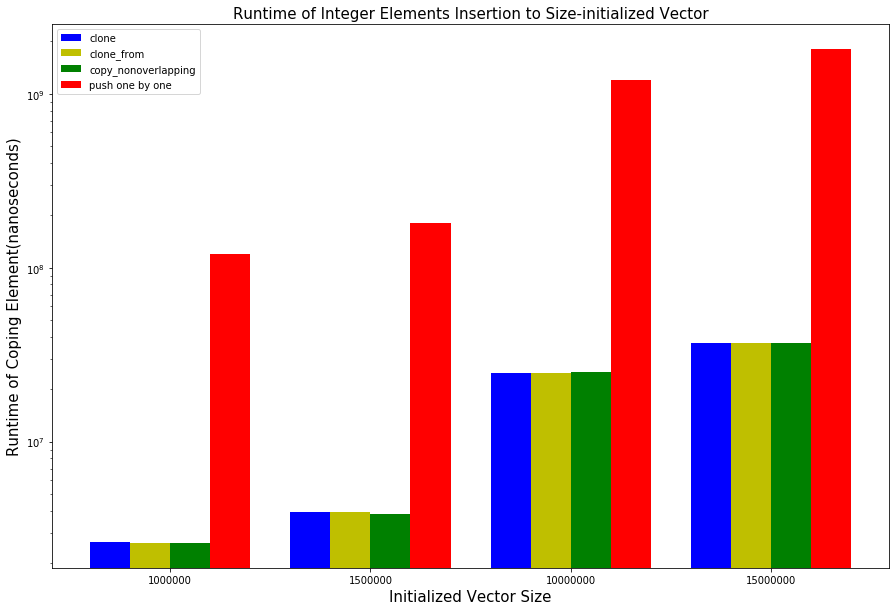

In [188]:
clone = df_avg_int[df_avg_int["method"] == '"clone"']
clone_from = df_avg_int[df_avg_int["method"] == '"clone_from"']
memcpy = df_avg_int[df_avg_int["method"] == '"memcpy"']
onebyone = df_avg_int[df_avg_int["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - 2*w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx - w, clone_from["addtime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx , memcpy['addtime'], width = w, color ='g', align = 'center')
b4 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
label = np.sort(df_avg_int['size'].unique())
ax.set_xticks(idx - w/ 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3, b4), ("clone", "clone_from", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
#fig.savefig("rust_various_insertion_integer.eps")
plt.show()

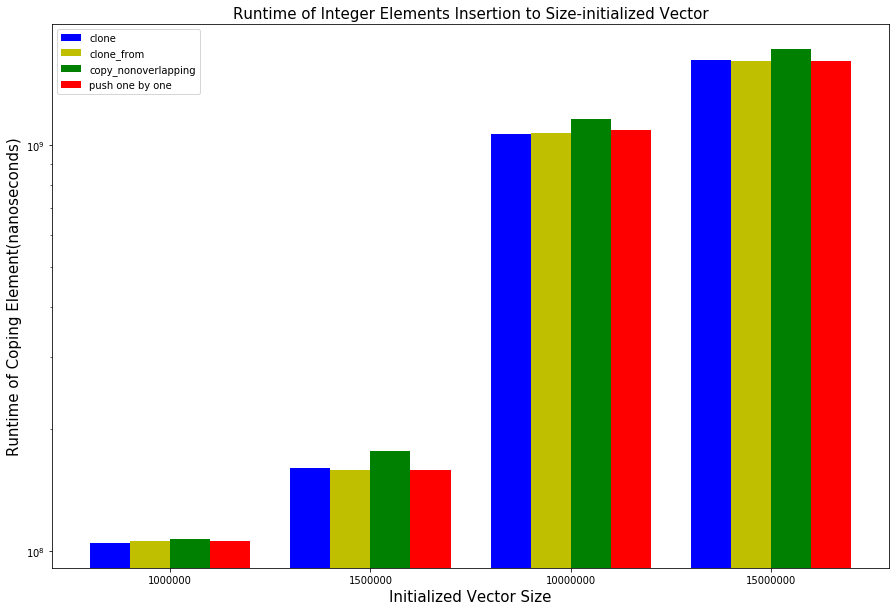

In [189]:
clone = df_avg_string[df_avg_string["method"] == '"clone"']
clone_from = df_avg_string[df_avg_string["method"] == '"clone_from"']
memcpy = df_avg_string[df_avg_string["method"] == '"memcpy"']
onebyone = df_avg_string[df_avg_string["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - 2*w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx - w, clone_from["addtime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx , memcpy['addtime'], width = w, color ='g', align = 'center')
b4 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
ax.set_xticks(idx - w/ 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3, b4), ("clone", "clone_from", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
#fig.savefig("rust_various_insertion_string.eps")
plt.show()